# The Sparks Foundation
GRIP MARCH,2021

## TASK 6 - Prediction using Decision Tree Algorithm
Create the Decision Tree classifier and visualize it graphically.

# Author - Sampurna Lal

In [1]:
# Importing the required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [2]:
df = pd.read_csv("Iris.csv")
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
df.shape

(150, 6)

In [4]:
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [5]:
df.dtypes #types of the features in the dataset

Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

In [6]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [7]:
df.info() #used to print a concise summary of the DataFrame.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


### Correlation matrix

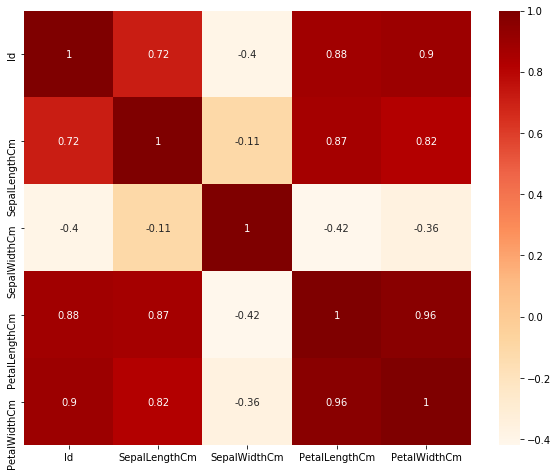

In [8]:
plt.figure(figsize=(10,8))
df.corr()
sns.heatmap(df.corr(), annot=True, cmap='OrRd')

### Splitting the Dataset into Train and Test 

In [9]:
train, test = train_test_split(df, test_size = 0.3)
print(train.shape)
print(test.shape)

(105, 6)
(45, 6)


In [10]:
X_train = train[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']].values
y_train=train.Species
X_test= test[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']].values 
y_test =test.Species

In [11]:
X_train[1:5]

array([[7.7, 2.8, 6.7, 2. ],
       [5.4, 3.4, 1.7, 0.2],
       [5.7, 2.5, 5. , 2. ],
       [4.9, 3.1, 1.5, 0.1]])

In [12]:
y_train.head()

106    Iris-virginica
122    Iris-virginica
20        Iris-setosa
113    Iris-virginica
37        Iris-setosa
Name: Species, dtype: object

## Training the algorithm
### Decision Tree

Decision Trees (DTs) are a non-parametric supervised learning method used for classification and regression. The goal is to create a model that predicts the value of a target variable by learning simple decision rules inferred from the data features. A tree can be seen as a piecewise constant approximation.

In [13]:
from sklearn import metrics
DT=DecisionTreeClassifier(criterion='entropy',random_state=100)
DT.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=100, splitter='best')

## Evaluating the model

### Accuracy Score

In [14]:
prediction=DT.predict(X_test)
print('The accuracy of the Decision Tree is',metrics.accuracy_score(prediction,y_test))

The accuracy of the Decision Tree is 0.9777777777777777


### F1 Score
The F1 score can be interpreted as a weighted average of the precision and recall, where an F1 score reaches its best value at 1 and worst score at 0.

In [15]:
from sklearn.metrics import f1_score
f1_DT=f1_score(prediction,y_test,average='weighted')
f1_DT

0.9777164750957854

In [16]:
print("Confusion Matrix:",confusion_matrix(y_test,prediction))

Confusion Matrix: [[18  0  0]
 [ 0 14  1]
 [ 0  0 12]]


In [17]:
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier 
from sklearn import tree
iris = datasets.load_iris()
X = iris.data
y = iris.target

In [18]:
clf = DecisionTreeClassifier(random_state=1234)
DT = clf.fit(X, y)

## Visualizing Decision Tree

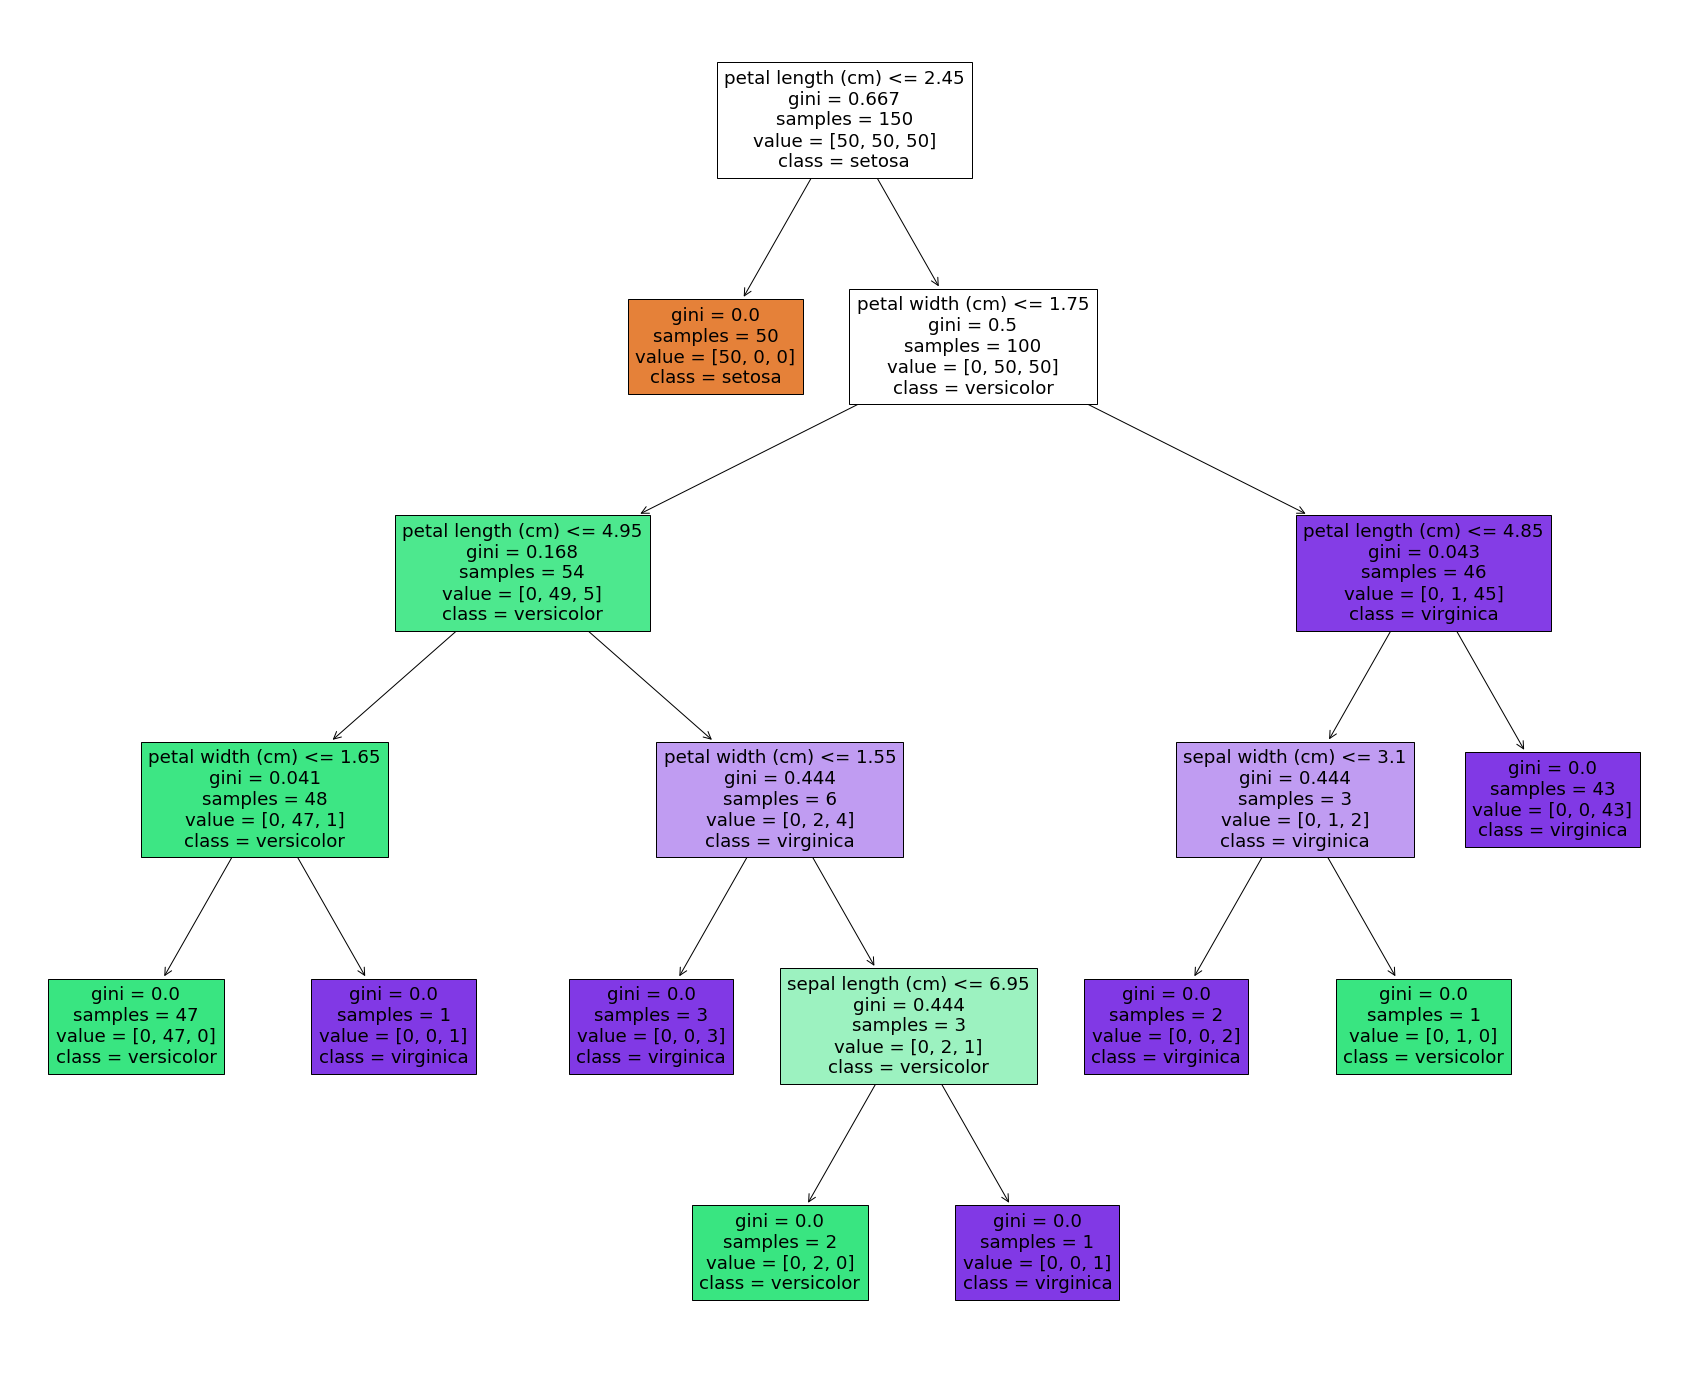

In [19]:
fig = plt.figure(figsize=(30,25))
_ = tree.plot_tree(clf, 
                   feature_names=iris.feature_names,  
                   class_names=iris.target_names,
                   filled=True)